In [9]:
import numpy as np
import matplotlib.pyplot as plt
import json
from jax_sph.io_state import read_args, read_h5

In [10]:

metadata = vars(read_args("2D_HT_SPH_123_20240209-213137/args.txt"))

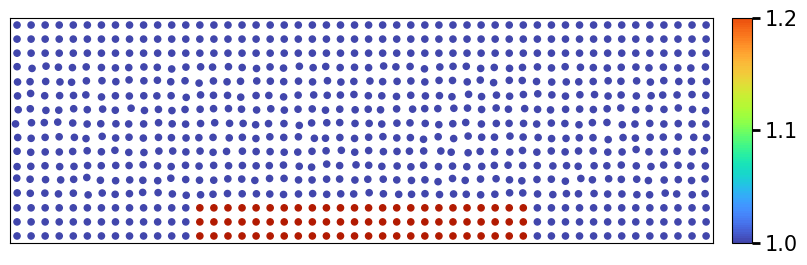

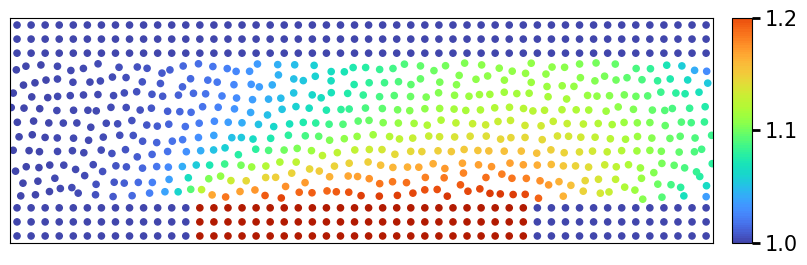

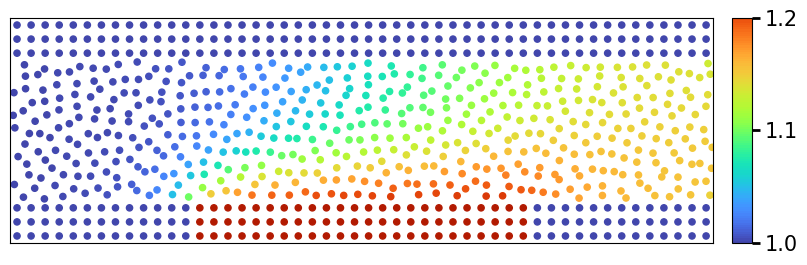

In [81]:
dir_path = "2D_HT_SPH_123_20240209-213137/"

for idx in [0,1650,3300]:
    filename = dir_path + "traj_{:04d}.h5".format(idx)
    data_dict = read_h5(filename, array_type='numpy')
    r = data_dict['r']
    v = data_dict['T']
     # cmap in ["hsv","cividis", "plasma", "plasma", "cool", "rainbow", "jet", "turbo", "winter", "viridis", "coolwarm"]:
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.scatter(r[:, 0], r[:, 1], vmin=0.98, vmax=1.25, c=v, cmap="turbo", s=20)
    ax.set_xlim(metadata["bounds"][0])
    ax.set_ylim(metadata["bounds"][1])
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid()

    # add colorbar underneath the image
    fig.tight_layout()
    fig.subplots_adjust(bottom=0.2)
    cax = fig.add_axes([0.87, 0.2, 0.02, 0.75])
    
    cbar = fig.colorbar(ax.collections[0], cax=cax, orientation='vertical', ticks=[1.0, 1.1, 1.2], boundaries=np.linspace(1.0, 1.2, 100),values=np.linspace(1.0, 1.2, 99))
   
    cbar.ax.tick_params(labelsize=15, length=6, width=2, )
    
    fig.savefig(f"v_{idx}.pdf")
    plt.show()
    plt.close()